# Loop Detection
## Of long (>30s) Samples

In [1]:
import os
import pretty_midi
from midi_player import MIDIPlayer
from midi_player.stylers import dark

midi_file = os.path.join("data", "inputs", "MIDI1.mid")
midi_data = pretty_midi.PrettyMIDI(midi_file)
piano_roll = midi_data.get_piano_roll()

MIDIPlayer(midi_file, 400, styler=dark)

In [2]:
bs = midi_data.estimate_beat_start()
os = midi_data.get_onsets()
print(bs, os[0])

21.760416666666664 [ 20.48958333  21.04166667  21.04166667 ... 315.265625   315.265625
 315.265625  ]


## Chroma SSM

In [4]:
import ssm_utils
import numpy as np

filter_lens = [1, 10, 25, 50]
downsamples = [5, 10, 15, 20]
ssms = []
novs = []
bnds = []

for fl in filter_lens:
    ssm_row = []
    nov_row = []
    bnd_row = []

    for ds in downsamples:
        sssm, n_smoothed = ssm_utils.gen_ssm_and_novelty(
            piano_roll, filter_length=fl, down_sampling=ds
        )
        boundary = ssm_utils.get_boundaries(
            n_smoothed, np.array(range(n_smoothed.shape[0]))
        )

        ssm_row.append(sssm)
        nov_row.append(n_smoothed)
        bnd_row.append(boundary)

    ssms.append(ssm_row)
    novs.append(nov_row)
    bnds.append(bnd_row)

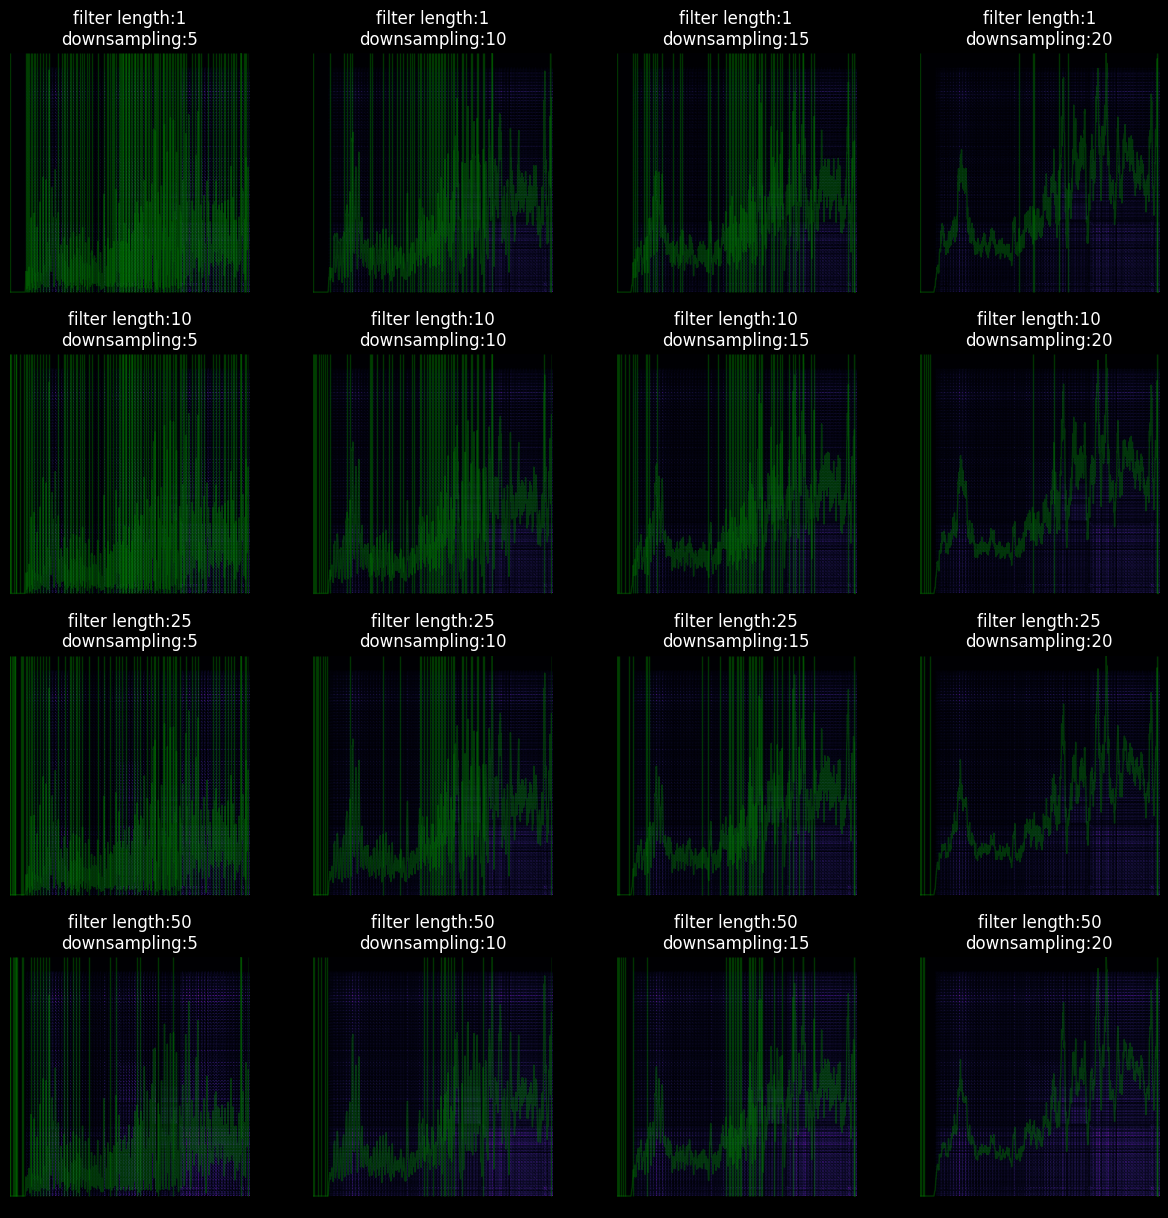

In [5]:
from matplotlib import pyplot as plt

plt.style.use("dark_background")
fig, axs = plt.subplots(4, 4, figsize=(15, 15))

for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.imshow(ssms[i][j] / ssms[i][j].max(), cmap="magma")  # ssm
        ax.plot(  # novelty curve
            (1 - novs[i][j] / novs[i][j].max()) * ssms[i][j].shape[0],
            "g",
            linewidth=1,
            alpha=0.4,
        )
        ax.vlines(  # chunk bounds
            bnds[i][j][0], ax.dataLim.y0, ax.dataLim.y1, "g", linewidth=1, alpha=0.4
        )
        ax.axis("off")
        ax.set_title(f"filter length:{filter_lens[i]}\ndownsampling:{downsamples[j]}")

plt.show()

## Divide the MIDI

In [10]:
bnds[0][0][1]

array([ 421,  456,  469,  501,  556,  580,  636,  661,  716,  795,  875,
        955, 1035, 1276, 1380, 1436, 1460, 1515, 1595, 1620, 1676, 1751,
       1780, 1835, 1911, 1960, 2020, 2076, 2156, 2316, 2476, 2555, 2579,
       2635, 2704, 2715, 2738, 2796, 2876, 2910, 2930, 2946, 2978, 2991,
       3025, 3057, 3070, 3116, 3137, 3150, 3185, 3230, 3276, 3298, 3310,
       3356, 3390, 3436, 3470, 3492, 3551, 3570, 3585, 3631, 3676, 3710,
       3790, 3826, 3860, 3871, 3916, 3950, 4031, 4050, 4078, 4110, 4156,
       4190, 4236, 4270, 4316, 4350, 4396, 4431, 4476, 4510, 4559, 4590,
       4636, 4796, 4875, 4956, 4998, 5035, 5240, 5356, 5436, 5520, 5560,
       5640, 5676, 5757, 5835, 5881, 5918, 5960, 6101, 6175, 6201, 6235,
       6302])